<a href="https://colab.research.google.com/github/Tiziri-k/SIC-exercices/blob/master/xgboost%20%26%20adaboost/xgboost_adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coding Exercise #0508

### 1. Bagging ensemble:

In [1]:
# Install once.
# !pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.

#### 1.1. Read in data:

In [3]:
# Load data.
data = load_breast_cancer()

In [4]:
# Explanatory variables.
X = data['data']
variable_names = data['feature_names']
print(variable_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
X.shape

(569, 30)

In [5]:
# Response variable.
# Relabel such that 0 = 'benign' and 1 = malignant.
Y = 1 - data['target']
label = list(data['target_names'])
label.reverse()
print(label)

['benign', 'malignant']


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#### 1.2. Random Forest:

In [7]:
# Classification by Random Forest.
RFC = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_leaf=2,random_state=123)
RFC.fit(X_train, Y_train)
Y_pred = RFC.predict(X_test)
print( "Random Forest accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Random Forest accuracy : 0.924


In [ ]:
# Display the top 10 most important variables.
variable_importance = pd.Series(RFC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

### 2. Boosting Ensemble:

#### 2.1.  AdaBoost:

Question 1 : Classification by AdaBoost use AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),n_estimators=100,learning_rate=0.01,random_state=123) then fit your training data.

In [16]:
# Classification by AdaBoost.
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=100,learning_rate=0.01,random_state=123)
ABC.fit(X_train, Y_train)
Y_pred = ABC.predict(X_test)
print( "AdaBoost accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

AdaBoost accuracy : 0.924


In [ ]:
# Display the top 10 most important variables.
variable_importance = pd.Series(ABC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

#### 2.2.  Gradient Boosting: 

Question 2: Use Gradient Boosting to classify your data set the parameters to : n_estimators=100,learning_rate=0.01,min_samples_leaf=2,max_leaf_nodes=30,random_state=123

In [18]:
# Classification by Gradient Boosting.

GBC = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,min_samples_leaf=2,max_leaf_nodes=30,random_state=123)
GBC.fit(X_train, Y_train)
Y_pred = GBC.predict(X_test)
print( "Gradient Boosting accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Gradient Boosting accuracy : 0.906


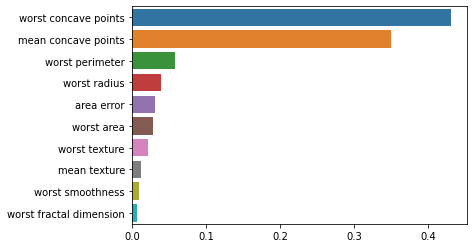

In [19]:
# Display the top 10 most important variables.
variable_importance = pd.Series(GBC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

#### 2.3. XGBoost


Question 3 : Use XGBoost to classify your data, set your parametrs to : n_estimator = 500, learning_Rate = 0.1, max_depth = 4, random_state=123

In [25]:
# Classification by XGBoost.
import xgboost as xgb
XB = xgb.XGBClassifier(n_estimator = 500, learning_Rate = 0.1, max_depth = 4, random_state=123)
XB.fit(X_train, Y_train)
Y_pred = XB.predict(X_test)
print( "Gradient Boosting accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Gradient Boosting accuracy : 0.942


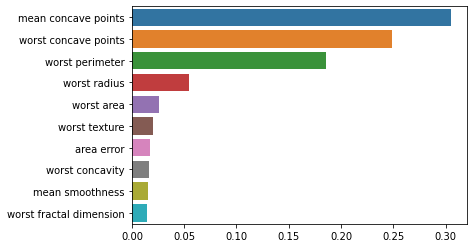

In [27]:
# Display the top 10 most important variables.
variable_importance = pd.Series(XB.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()